C:\DS\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\DS\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\DS\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


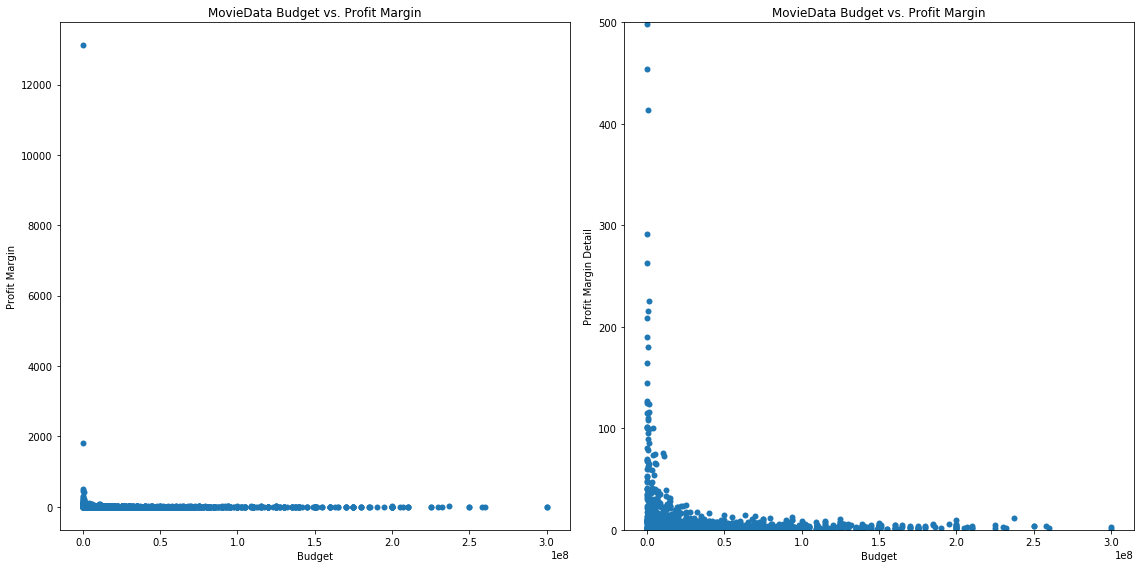

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
# Movie Budgets vs Profit Margin. Resize the Y axis as needed to convey the most information
def makedate(str):
    m,d,y = str.split("/")
    m = int(m)
    d = int(d)
    y = int(y)
    if y > 13:
        y += 1900
    else:
        y += 2000
    return dt.datetime(y,m,d)
movies_df = pd.read_csv("MovieData.csv", sep='\t', na_values = ["Unknown", "Unkno"], parse_dates=[0], date_parser=makedate)
movies_df.dtypes
movies_df = movies_df.fillna(0)
movies_df["Worldwide Gross"][movies_df["Worldwide Gross"] == 0] = movies_df["US Gross"]
movies_df["Profit_Margin"] =movies_df["Worldwide Gross"]/movies_df["Budget"]
movies_df["Profit"] =movies_df["Worldwide Gross"] - movies_df["Budget"]
movies_df['Profit_Margin'][movies_df['Profit_Margin'] == 0] = None #ignore 0 values
movies_df['Profit'][movies_df['Worldwide Gross'] == 0] = None #ignore 0 values

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
ax1.scatter(movies_df.Budget, movies_df.Profit_Margin, linewidth = 0)
ax1.set_title("MovieData Budget vs. Profit Margin")
ax1.set_xlabel("Budget")
ax1.set_ylabel("Profit Margin")

ax2 = fig.add_subplot(122)
ax2.scatter(movies_df.Budget, movies_df.Profit_Margin, linewidth = 0)
ax2.set_title("MovieData Budget vs. Profit Margin")
ax2.set_xlabel("Budget")
ax2.set_ylabel("Profit Margin Detail")
ax2.set_ylim(0,500)
fig.tight_layout()
plt.show()
#movies_df.sort_values(by=['Profit'])[['Budget', 'US Gross', 'Worldwide Gross', 'Profit']][-70:]
#movies_df.loc[movies_df['Profit_Margin'].idxmax()]

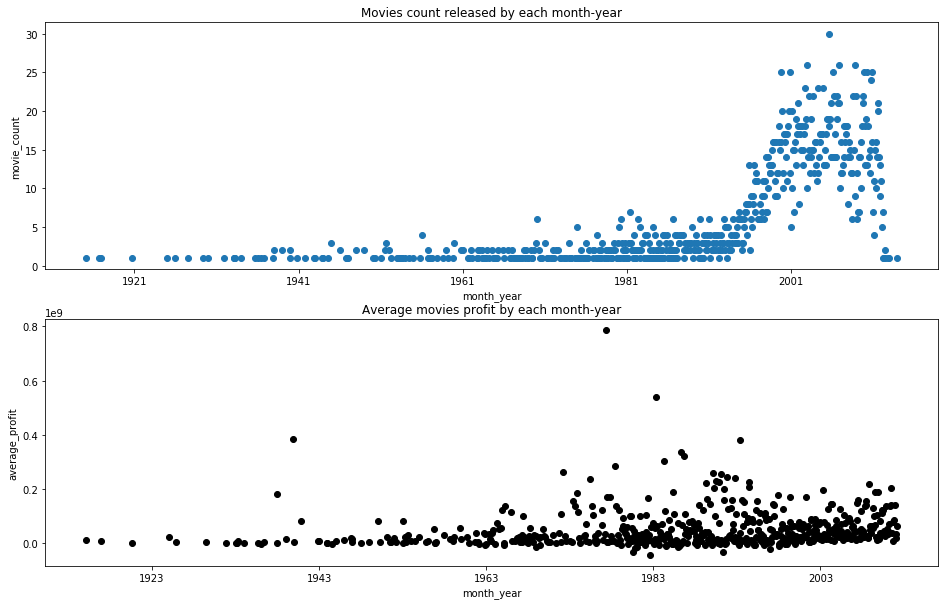

In [2]:
# movies count released by month-year, movies' average profitability.
import numpy as np
movies_df['monthyear'] = movies_df.Release_Date.apply(lambda x: dt.datetime(x.year, x.month, 1))
by_month_year = movies_df.groupby(["monthyear"])
count = by_month_year.Movie.aggregate(len)
profit = by_month_year.Profit.mean()

bymonthyear_df = pd.DataFrame({'moviescount': count, 'averageprofit':profit})
gif = plt.figure(figsize=(16,10))
ax1 = gif.add_subplot(211)
ax1.set_xlabel('month_year')
ax1.set_ylabel('movie_count')
ax1.set_title('Movies count released by each month-year')
ax1.scatter(bymonthyear_df.index, bymonthyear_df.moviescount)
ax1 = gif.add_subplot(212)
ax1.set_xlabel('month_year')
ax1.set_ylabel('average_profit')
ax1.set_title('Average movies profit by each month-year')
ax1.scatter(bymonthyear_df.index, bymonthyear_df.averageprofit, c='k')
plt.show()